In [1]:
# Dependencies and Setup
import pandas as pd
from pathlib import Path


In [2]:
# Read .csv file
purchases_df = pd.read_csv(r"Estimated_Purchases.csv")
purchases_df.head(5)


,ESTIMATED_PURCHASES
0,25.669994
1,13.755650
2,24.586235
3,11.486823
4,31.717091


In [3]:
# Read .csv file
main_df = pd.read_csv(r"Sub_Category.csv")
main_df.head(5)



,Sub_Cat
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN


In [4]:
sub_df = pd.read_csv(r"Main_Cat.csv")
sub_df.head(5)


,MAIN_CATEGORY
0,Target
1,Target
2,Target
3,Target
4,Target


In [5]:
month_df = pd.read_csv(r"./Month.csv")
month_df.head(5)


,MONTH
0,1
1,1
2,1
3,1
4,1


In [6]:
combined_df = pd.concat([purchases_df, main_df, month_df, sub_df], axis=1)
combined_df.head(5)


,ESTIMATED_PURCHASES,Sub_Cat,MONTH,MAIN_CATEGORY
0,25.669994,NaN,1,Target
1,13.755650,NaN,1,Target
2,24.586235,NaN,1,Target
3,11.486823,NaN,1,Target
4,31.717091,NaN,1,Target


In [7]:
unique_count = combined_df['Sub_Cat'].nunique()

print("Number of unique string values:", unique_count)

Number of unique string values: 2543


In [8]:
unique_countmain = combined_df['MAIN_CATEGORY'].nunique()

print("Number of unique string values:", unique_countmain)

Number of unique string values: 204


In [9]:
# unique_strings = combined_df['MAIN_CATEGORY'].unique()

# print("List of unique strings:")
# print(unique_strings)

In [10]:
value_counts = combined_df['MAIN_CATEGORY'].value_counts()

print("Count of each unique string:")
print(value_counts)

Count of each unique string:
MAIN_CATEGORY
Clothing, Shoes & Jewelry                 7447450
Home & Kitchen                            3377355
Books                                     1991855
Electronics                               1703229
Sports & Outdoors                         1688453
                                           ...   
Target Next Day Delivery                        1
Heavy Duty & Commercial Vehicles Parts          1
Movies & tv shows                               1
Try Audible Free                                1
Baby test                                       1
Name: count, Length: 204, dtype: int64


In [11]:
#make a df containing only the top 50 main categories
top_8_values = value_counts.head(8).index.tolist()

filtered_df = combined_df[combined_df['MAIN_CATEGORY'].isin(top_8_values)]


filtered_df.head(5)


,ESTIMATED_PURCHASES,Sub_Cat,MONTH,MAIN_CATEGORY
77452,43.614090,Clothing - Shoes,1,Health & Household
77453,12.152164,Clothing - Shoes,1,"Clothing, Shoes & Jewelry"
77454,27.934627,Clothing - Shoes,1,"Clothing, Shoes & Jewelry"
77455,22.362249,Clothing - Shoes,1,"Clothing, Shoes & Jewelry"
77456,15.202142,Clothing - Shoes,1,Books


In [12]:
column_order = ['MONTH', 'MAIN_CATEGORY', 'Sub_Cat', 'ESTIMATED_PURCHASES']
filtered_df = filtered_df[column_order]
filtered_df
# print(filtered_df.columns)

,MONTH,MAIN_CATEGORY,Sub_Cat,ESTIMATED_PURCHASES
77452,1,Health & Household,Clothing - Shoes,43.614090
77453,1,"Clothing, Shoes & Jewelry",Clothing - Shoes,12.152164
77454,1,"Clothing, Shoes & Jewelry",Clothing - Shoes,27.934627
77455,1,"Clothing, Shoes & Jewelry",Clothing - Shoes,22.362249
77456,1,Books,Clothing - Shoes,15.202142
...,...,...,...,...
32060674,6,"Clothing, Shoes & Jewelry",Health & Household - Household Supplies,66.930551
32060675,6,"Clothing, Shoes & Jewelry",Health & Household - Household Supplies,21.113707
32060676,6,"Clothing, Shoes & Jewelry",Health & Household - Household Supplies,19.767504
32060677,6,"Clothing, Shoes & Jewelry",Health & Household - Household Supplies,19.767504


In [38]:
top_20_values = value_counts.head(20).index.tolist()

filtered_df2 = combined_df[combined_df['MAIN_CATEGORY'].isin(top_20_values)]


filtered_df2


,ESTIMATED_PURCHASES,Sub_Cat,MONTH,MAIN_CATEGORY
0,25.669994,NaN,1,Target
1,13.755650,NaN,1,Target
2,24.586235,NaN,1,Target
3,11.486823,NaN,1,Target
4,31.717091,NaN,1,Target
...,...,...,...,...
32060674,66.930551,Health & Household - Household Supplies,6,"Clothing, Shoes & Jewelry"
32060675,21.113707,Health & Household - Household Supplies,6,"Clothing, Shoes & Jewelry"
32060676,19.767504,Health & Household - Household Supplies,6,"Clothing, Shoes & Jewelry"
32060677,19.767504,Health & Household - Household Supplies,6,"Clothing, Shoes & Jewelry"


In [40]:
count_ones = combined_df[combined_df['ESTIMATED_PURCHASES'] < 2].shape[0]
print("Number of rows with a value of 1 in estimated_purchases:", count_ones)

Number of rows with a value of 1 in estimated_purchases: 1148342


In [13]:
#Filter by month
month_1 = filtered_df[filtered_df['MONTH'] == 1]
month_2 = filtered_df[filtered_df['MONTH'] == 2]
month_3 = filtered_df[filtered_df['MONTH'] == 3]
month_4 = filtered_df[filtered_df['MONTH'] == 4]
month_5 = filtered_df[filtered_df['MONTH'] == 5]
month_6 = filtered_df[filtered_df['MONTH'] == 6]

#Put the Categories in Ascending order for consistency
month_1 = month_1.sort_values(by='MAIN_CATEGORY')
month_2 = month_2.sort_values(by='MAIN_CATEGORY')
month_3 = month_3.sort_values(by='MAIN_CATEGORY')
month_4 = month_4.sort_values(by='MAIN_CATEGORY')
month_5 = month_5.sort_values(by='MAIN_CATEGORY')
month_6 = month_6.sort_values(by='MAIN_CATEGORY')

#Group by month
month_1_group = month_1.groupby(['MONTH','MAIN_CATEGORY']).sum(numeric_only=True)['ESTIMATED_PURCHASES']
month_2_group = month_2.groupby(['MONTH','MAIN_CATEGORY']).sum(numeric_only=True)['ESTIMATED_PURCHASES']
month_3_group = month_3.groupby(['MONTH','MAIN_CATEGORY']).sum(numeric_only=True)['ESTIMATED_PURCHASES']
month_4_group = month_4.groupby(['MONTH','MAIN_CATEGORY']).sum(numeric_only=True)['ESTIMATED_PURCHASES']
month_5_group = month_5.groupby(['MONTH','MAIN_CATEGORY']).sum(numeric_only=True)['ESTIMATED_PURCHASES']
month_6_group = month_6.groupby(['MONTH','MAIN_CATEGORY']).sum(numeric_only=True)['ESTIMATED_PURCHASES']

#show dataframe
month_1_group.info()

<class 'pandas.core.series.Series'>
MultiIndex: 8 entries, (1, 'Beauty & Personal Care') to (1, 'Tools & Home Improvement')
Series name: ESTIMATED_PURCHASES
Non-Null Count  Dtype  
--------------  -----  
8 non-null      float64
dtypes: float64(1)
memory usage: 268.0+ bytes


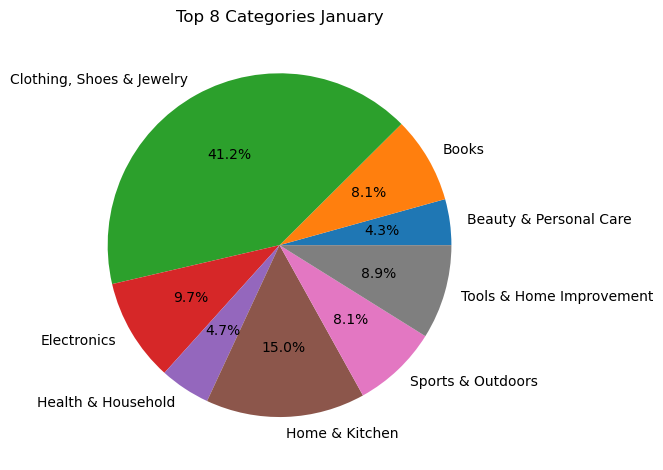

<Figure size 1000x800 with 0 Axes>

In [36]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

#Label pie chart
labels1 = month_1['MAIN_CATEGORY'].unique()

#Create pie chart
plt.gca().set_aspect('equal') 
plt.title('Top 8 Categories January')

ax.pie(month_1_group, labels = labels1, autopct='%1.1f%%')
plt.tight_layout()
# plt.figure(figsize=(10, 8))
plt.savefig('jan_pie.png')


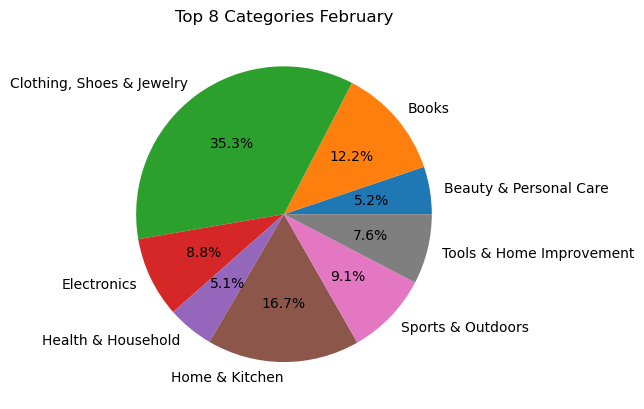

In [22]:
fig, ax = plt.subplots()

#Label pie chart
labels2 = month_2['MAIN_CATEGORY'].unique()

#Create pie chart
plt.gca().set_aspect('equal') 
plt.title('Top 8 Categories February')

ax.pie(month_2_group, labels = labels2, autopct='%1.1f%%')
plt.savefig('feb_pie.png')


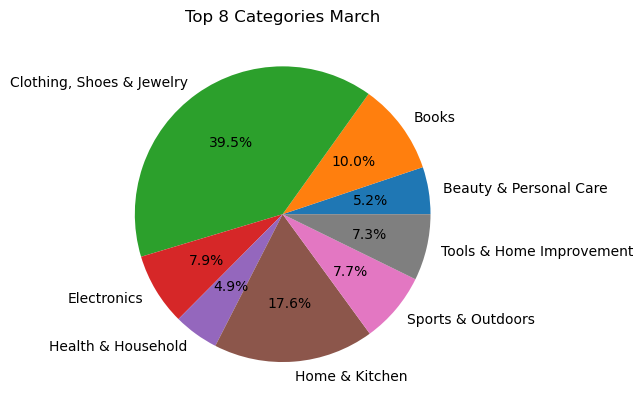

In [23]:
fig, ax = plt.subplots()

#Label pie chart
labels3 = month_3['MAIN_CATEGORY'].unique()

#Create pie chart
plt.gca().set_aspect('equal') 
plt.title('Top 8 Categories March')

ax.pie(month_3_group, labels = labels3, autopct='%1.1f%%')
plt.savefig('mar_pie.png')


In [ ]:
# column_type = filtered_df['ESTIMATED_PURCHASES'].dtype
# column_type

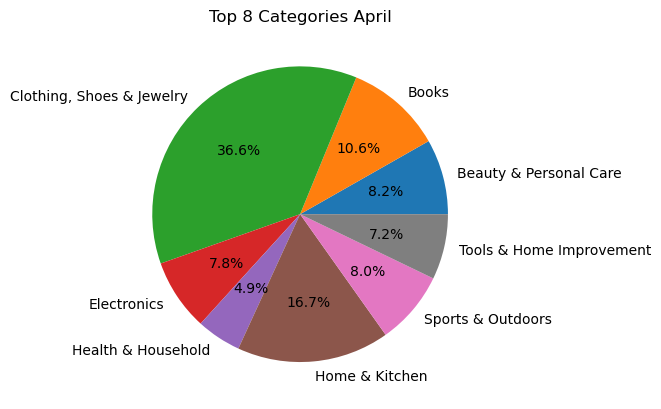

In [24]:
fig, ax = plt.subplots()

#Label pie chart
labels4 = month_4['MAIN_CATEGORY'].unique()

#Create pie chart
plt.gca().set_aspect('equal') 
plt.title('Top 8 Categories April')

ax.pie(month_4_group, labels = labels4, autopct='%1.1f%%')
plt.savefig('april_pie.png')


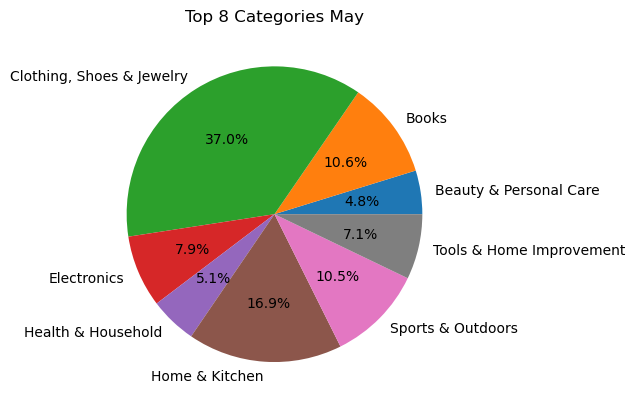

In [28]:
fig, ax = plt.subplots()

#Label pie chart
labels5 = month_5['MAIN_CATEGORY'].unique()

#Create pie chart
plt.gca().set_aspect('equal') 
plt.title('Top 8 Categories May')

ax.pie(month_5_group, labels = labels5, autopct='%1.1f%%')
plt.savefig('may_pie.png')


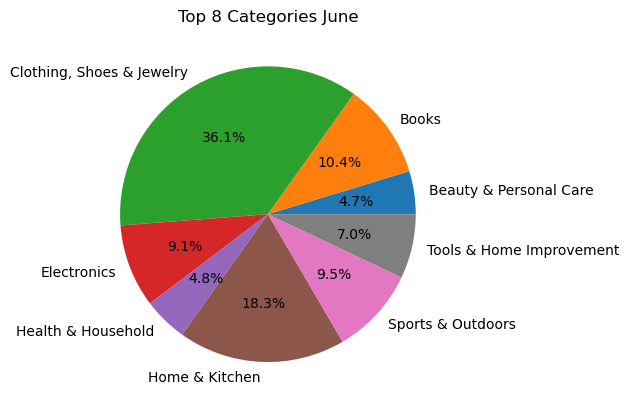

In [27]:
fig, ax = plt.subplots()

#Label pie chart
labels6 = month_6['MAIN_CATEGORY'].unique()

#Create pie chart
plt.gca().set_aspect('equal') 
plt.title('Top 8 Categories June')

ax.pie(month_6_group, labels = labels6, autopct='%1.1f%%')
plt.savefig('june_pie.png')


In [ ]:
unique_months = filtered_df['MONTH'].unique()
unique_categories = filtered_df['MAIN_CATEGORY'].unique()

# Perform operations for each combination of 'MONTH' and 'MAIN_CATEGORY'
for month in unique_months:
    for category in unique_categories:
        subset = filtered_df[(filtered_df['MONTH'] == month) & (filtered_df['MAIN_CATEGORY'] == category)]
        # Perform custom operations or calculations with the subset of data for this combination
        # For example, print the sum of 'ESTIMATED_PURCHASES' for this combination
        print(f"{month} - {category}: Sum = {subset['ESTIMATED_PURCHASES'].sum()}")